In [2]:
import numpy as np
from scipy.linalg import eigh
from scipy.optimize import minimize
from math import exp

In [3]:
def H(x,y):
    return (3*x*y*(np.pi)**(3/2)*(x+y)**(1/2))/(x**3+y**3+3*(x*y)*(x+y))-2*np.pi/(x+y)
def S(x,y):
    return (np.pi/(x+y))**(3/2)

In [16]:
def EN(Params,N):
    N = len(Params)
    HN = np.zeros((N,N),float)
    SN = np.zeros((N,N),float)
    alpha = np.zeros(N,float)
    alpha = np.absolute(Params)
    for i in range (0,N):
        for j in range (i,N):
            HN[i,j] = H(alpha[i],alpha[j])
            SN[i,j] = S(alpha[i],alpha[j])
            HN[j,i] = HN[i,j]
            SN[j,i] = SN[i,j]
    eigvals, eigvecs = eigh(HN, SN, lower=False)
    return eigvals[0]
def ENparam(Params,N):
    res = minimize(EN, Params, args=(N), method='Nelder-Mead',constraints=())
    return np.absolute(res.x)
def ENcoeff(Params,N):
    N = len(Params)
    HN = np.zeros((N,N),float)
    SN = np.zeros((N,N),float)
    alpha = np.zeros(N,float)
    alpha = Params
    for i in range (0,N):
        for j in range (i,N):
            HN[i,j] = H(alpha[i],alpha[j])
            SN[i,j] = S(alpha[i],alpha[j])
            HN[j,i] = HN[i,j]
            SN[j,i] = SN[i,j]
    eigvals, eigvecs = eigh(HN, SN, lower=False)
    return eigvecs[:,0]


In [17]:
def Hydrogen(r):
    return ((((1/np.pi)**(1/2))))*exp(-r)    
def gaussN(r,alpha,coeff,N):
    a = alpha
    c = coeff
    res = 0
    for i in range (0,N):
        res = res+coeff[i]*exp(-abs(alpha[i])*r**2)
    return res

In [18]:
EN([0.28291016,4.56,2.1,0.027,16.103],5)

-0.49116618444998594

-0.42441318022412705 [0.28291016]
-0.4858127165753113 [0.20153507 1.33252608]
-0.4969792527036488 [0.15137551 0.68128847 4.50038178]
-0.4992784057143374 [ 0.12194964  0.44453813  1.96225704 13.01067175]
-0.49980983223188785 [ 0.10307246  0.32723054  1.16466317  5.12357686 34.06132841]
-0.49994557039664855 [ 0.08996893  0.2585945   0.80000969  2.83305358 12.45242555 82.92180137]
-0.499983297789157 [8.03165435e-02 2.13977130e-01 5.98539392e-01 1.84124842e+00
 6.50957756e+00 2.86052317e+01 1.90687206e+02]
-0.49999456139074416 [7.28843707e-02 1.82799884e-01 4.73461638e-01 1.31638904e+00
 4.04181800e+00 1.42795837e+01 6.27453554e+01 4.18557729e+02]


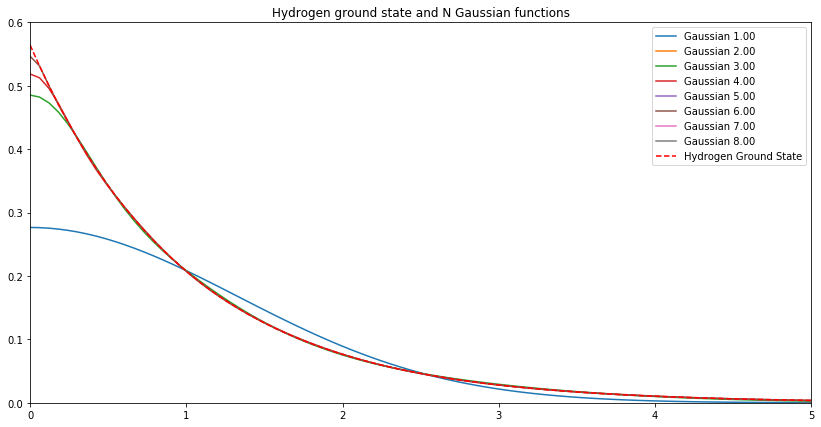

In [14]:
import matplotlib.pyplot as plt
x = np.linspace(0, 6.0, 100)
y = np.zeros(100,float)
gaussP = np.zeros(100,float)
for i in range (0,100):
    y[i] = Hydrogen(x[i])
plt.figure(figsize=(14,7))
for j in range (0,8):
    N = j+1
    initguess = np.zeros(N,float)
    if (j == 0):
        initguess[0] = 0.5
    else:
        for k in range (0,N):
            if (k<N-1):
                initguess[k] = alpha[k]
            else:
                initguess[k] = alpha[k-1]*2
    alpha = ENparam(initguess,N)
    c = ENcoeff(alpha,N)
    print(EN(alpha,N),alpha)
    for i in range (0,100):
        gaussP[i] = gaussN(x[i],alpha,c,N)
    plt.plot(x,gaussP, label='Gaussian %.2f' %N)  
plt.title('Hydrogen ground state and N Gaussian functions')

plt.plot(x, y, 'r--', label='Hydrogen Ground State')
plt.axis([0, 5, 0, 0.6])
plt.legend()


Try constraints
try alpha = beta^2

take as initial guess previous alpha + some number >